In [1]:
from datetime import datetime
import pandas_datareader.data as wb
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [12]:
Q = pd.read_csv('Q_input.csv')
day = pd.read_csv('day_input.csv')

In [13]:
X = day.iloc[:,:-1]
Y = day.iloc[:,-1:]

In [14]:
Y.head()

,Y
0,0.503771
1,0.516934
2,0.520636
3,0.528863
4,0.525847


In [15]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, SimpleRNN
from tensorflow.keras.layers import LSTM
import matplotlib.pyplot as plt

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.1, random_state=10)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.1, random_state=10)

In [18]:
# 파라미터 설정
learning_rate = 0.01
training_cnt = 100
batch_size = 32
input_size = X_train.shape[1]

time_step = 1

# reshape into (size(개수), time step, 입력 feature)
X_train = X_train.values.reshape(X_train.shape[0],1,input_size)
X_val = X_val.values.reshape(X_val.shape[0], 1, input_size)
X_test = X_test.values.reshape(X_test.shape[0], 1, input_size)
X_train.shape, X_test.shape

((2324, 1, 2), (287, 1, 2))

# RNN으로 학습

In [19]:
# 모델구조
model = Sequential()
model.add(SimpleRNN(512,input_shape=(time_step,input_size))) # 512는 다른숫자로도 사용가능
# model.add(Dense(512, activation='tanh'))
model.add(Dense(1,activation='tanh')) #output(target)은 '종가'이기 때문에 1요소 = Dense의 output레이어는 1로 설정
model.add(Dropout(0.2))

#오차 및 최적화기 설정
model.compile(loss='mse',optimizer='rmsprop',metrics=['mae','mape'])
model.summary()

#학습
history = model.fit(X_train, y_train, epochs=training_cnt, batch_size=batch_size, verbose=1)
val_mse, val_mae, val_mape = model.evaluate(X_test, y_test, verbose=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 512)               263680    
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
_________________________________________________________________
dropout (Dropout)            (None, 1)                 0         
Total params: 264,193
Trainable params: 264,193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
73/73 [==============================] - 2s 6ms/step - loss: 0.1170 - mae: 0.2415 - mape: 95062.2188
Epoch 2/100
73/73 [==============================] - 0s 6ms/step - loss: 0.0983 - mae: 0.2117 - mape: 99683.8516
Epoch 3/100
73/73 [==============================] - 0s 6ms/step - loss: 0.1139 - mae: 0.2287 - mape: 90762.1172
Epoch 4/100
73/73 [======================

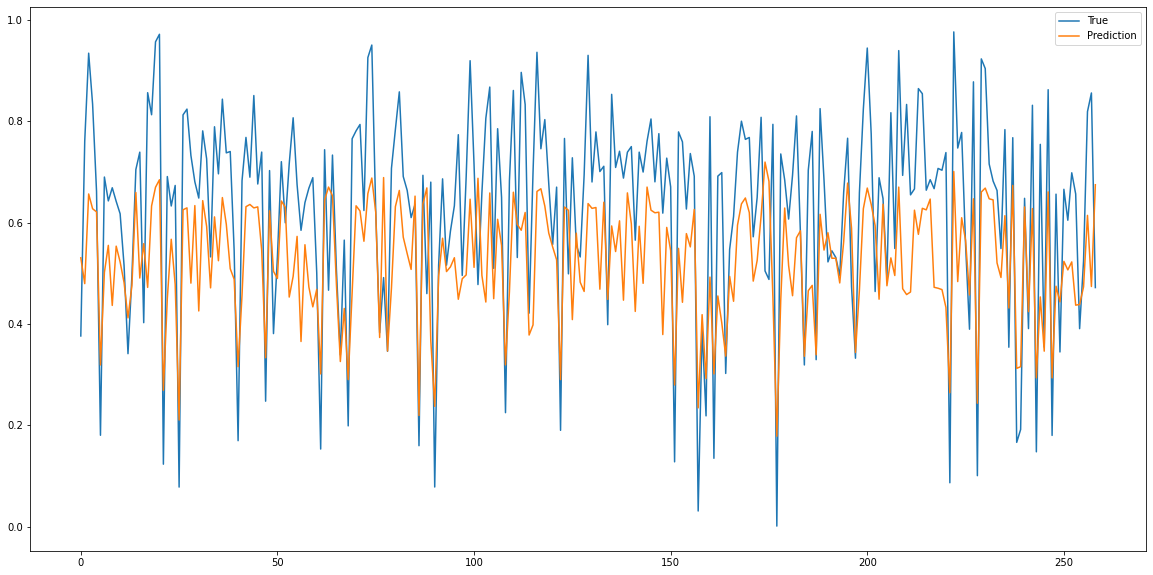

In [62]:
#학습이 잘 이루어졌는지 예측
pred = model.predict(X_val)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_val.reset_index().Y, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(pred,y_val))
print(r2_score(pred,y_val))


0.03108355932331662
-1.3200386059266584


In [35]:
import matplotlib.pyplot as plt


In [58]:
p = pd.DataFrame(pred)
p['Y'] = y_test.reset_index().Y
p.columns =['pred', 'Y']
p.plot.scatter(x = 'pred', y = 'Y')

In [65]:
p['Y'] = y_test.reset_index().Y

In [64]:
p.columns =['pred', 'Y']

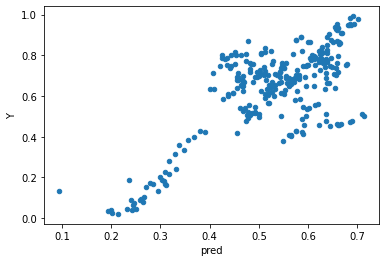

In [66]:
p.plot.scatter(x = 'pred', y = 'Y')

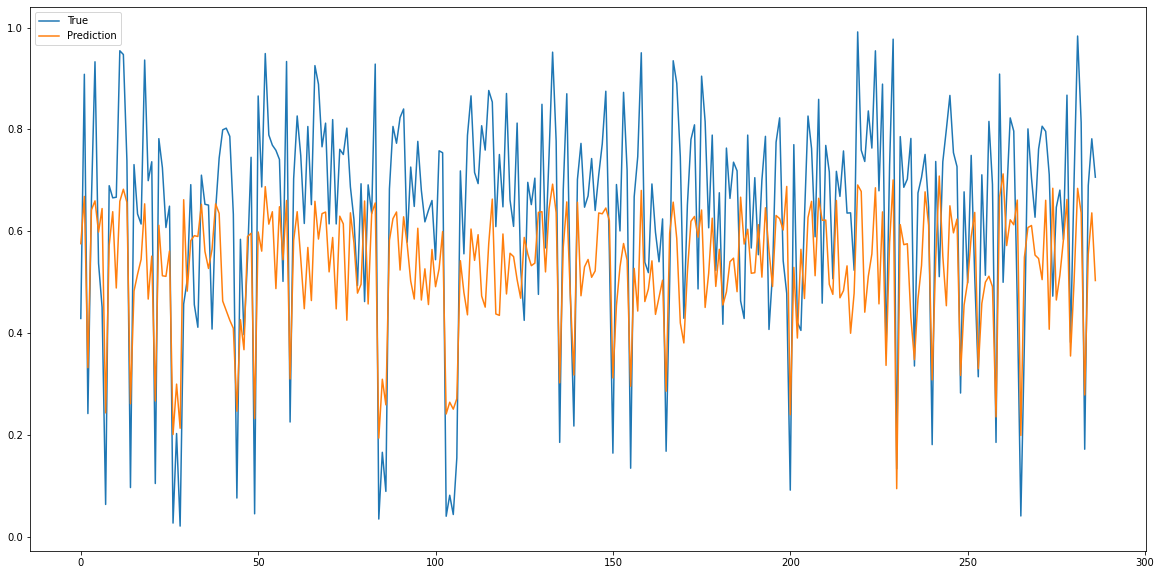

In [31]:
pred = model.predict(X_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test.reset_index().Y, label='True')
ax.plot(pred, label='Prediction')

ax.legend()
plt.show()

R 스퀘어, 로스, rmse, mse  ,,, 정확도를 보느냐 거리를 보느냐

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(pred,y_test))
print(r2_score(pred,y_test))


0.0342653920027966
-1.391768490981431


# LSTM 으로 학습

In [90]:
# 모델 구조
model = Sequential()
model.add(LSTM(512,input_shape=(1,input_size))) # 512는 다른 숫자로도 가능
model.add(Dropout(0.2)) 
model.add(Dense(1,activation='tanh')) #output(target)은 '종가'이기 때문에 1요소 = Dense의 output레이어는 1로 설정

#오차 및 최적화기 설정
model.compile(loss='mse',optimizer='rmsprop',metrics=['mae','mape'])
model.summary()


#학습
history = model.fit(X_train,y_train,epochs=200, batch_size=batch_size, verbose=1)
val_mse, val_mae, val_mape = model.evaluate(X_test, y_test, verbose=0)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 512)               1054720   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 513       
Total params: 1,055,233
Trainable params: 1,055,233
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
73/73 [==============================] - 3s 22ms/step - loss: 0.1032 - mae: 0.2537 - mape: 85025.7031
Epoch 2/200
73/73 [==============================] - 2s 24ms/step - loss: 0.0196 - mae: 0.1113 - mape: 62715.7031
Epoch 3/200
73/73 [==============================] - 2s 24ms/step - loss: 0.0192 - mae: 0.1092 - mape: 75996.7734
Epoch 4/200
73/73 [=============

In [91]:
pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(pred,y_test))
print(r2_score(pred,y_test))


0.004095931080799073
0.9108189661885423


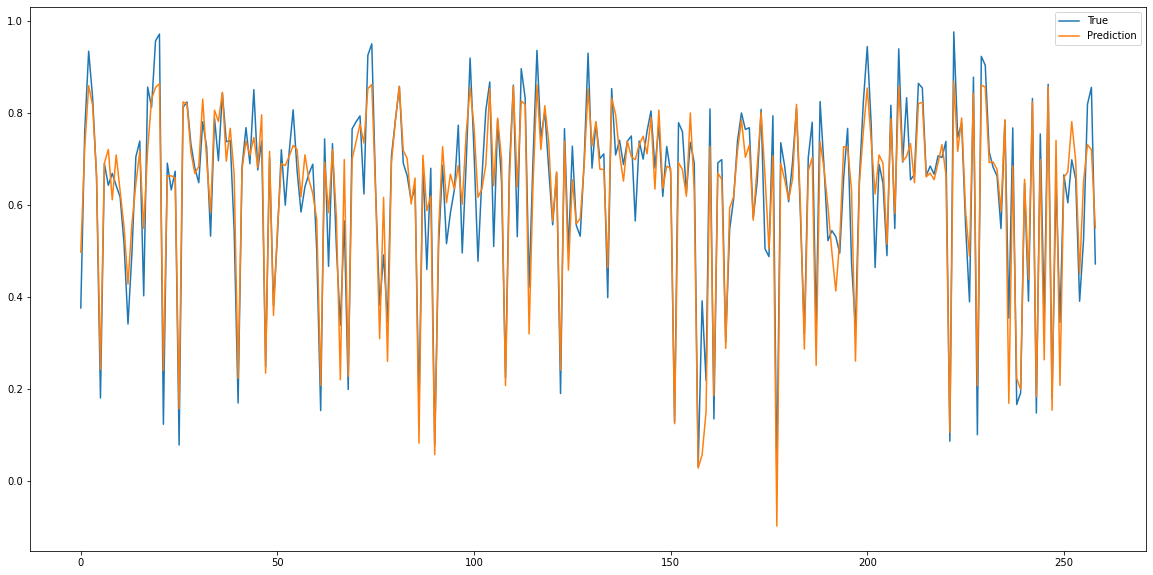

In [70]:
#최근 500일 정도의 예측 그래프 
pred = model.predict(X_val)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_val.reset_index().Y, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

test 셋으로 실제값과 예측값 차이 확인

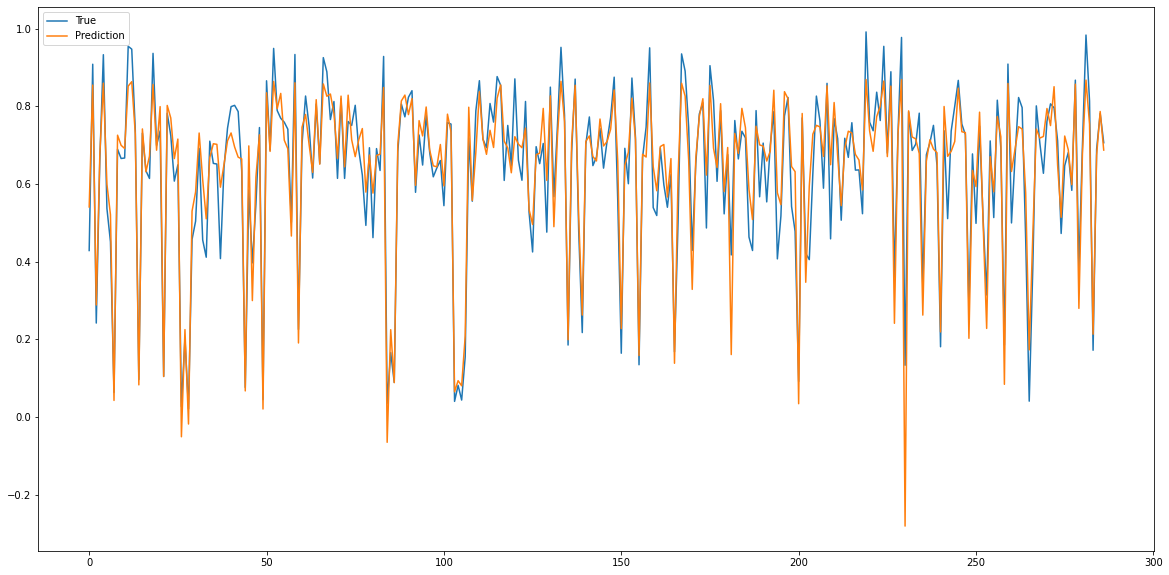

In [71]:
pred = model.predict(X_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test.reset_index().Y, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()